<a href="https://www.kaggle.com/code/nawafm/seattle-airbnb-data-analysis-kaggle?scriptVersionId=132273055" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1.Introduction

this project is part of the nanodegree program for data science in Udacity, i will analyze Seattle Airbnb data using the CRISP-DM method which consist of the 6 step process:

1.Buisness understanding.

2.Data Understanding.

3.Data Preperation.

4.Data Modeling.

5.Result Evaluation.

6.Deployment.

1.Business Understanding

Airbnb was born in 2007, and has since grown to over 4 million Hosts who have welcomed 1.4 billion guest arrivals in almost every country across the globe.
Airbnb is an online marketplace that connects people who want to rent out their property with people who are looking for accommodations in specific locales. Airbnb offers people an easy, relatively stress-free way to earn some income from their property.

Q1.first by taking a glempse of the data i wanted to see which month,day have the highest price from the listings ? and how is that related to the avaliability of the listing by Month and Day ?

Q2.Which is the highest Neighbourhood in Seatle with the Average Review Score ?? the Most Expensive Neighbourhood to rent in and the Chepeast ?? and if there's a correlation between prices and reviews ?


2.Data Understanding and Exploration


2.1 Importing our libraries we will use for the EDA (Exploration Data Analysis): 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.2 Reading the data using Pandas Library

In [2]:
AirBNB_Calander = pd.read_csv("/kaggle/input/seattle/calendar.csv")
AirBNB_Listings = pd.read_csv("/kaggle/input/seattle/listings.csv")
AirBNB_Reviews = pd.read_csv("/kaggle/input/seattle/reviews.csv")

2.3 Exploring the Variables inside each of the three data

In [3]:
for data in [AirBNB_Calander,AirBNB_Listings,AirBNB_Reviews]:
    display(data.head())
    print(data.shape)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


(1393570, 4)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


(3818, 92)


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


(84849, 6)


2.4 Checking the most Variable with the highest NA values

In [4]:
print(AirBNB_Listings.isna().mean().sort_values(ascending=False).head(35))

license                        1.000000
square_feet                    0.974594
monthly_price                  0.602672
security_deposit               0.511262
weekly_price                   0.473808
notes                          0.420639
neighborhood_overview          0.270299
cleaning_fee                   0.269775
transit                        0.244631
host_about                     0.224987
host_acceptance_rate           0.202462
review_scores_accuracy         0.172342
review_scores_checkin          0.172342
review_scores_value            0.171818
review_scores_location         0.171556
review_scores_cleanliness      0.171032
review_scores_communication    0.170508
review_scores_rating           0.169460
last_review                    0.164222
first_review                   0.164222
reviews_per_month              0.164222
space                          0.149031
host_response_rate             0.136983
host_response_time             0.136983
neighbourhood                  0.108958


We can see Above that the License Variable has none values at all so it is best to remove it even the Square feet variable with 97% of the values is null so it is best to remove both columns.

In [5]:
AirBNB_Listings = AirBNB_Listings.drop(columns=['license', 'square_feet'])
print(AirBNB_Listings.shape)

(3818, 90)


2.5 we write a function that takes the number from Price and exclude the $ character.

In [6]:
def handle_price(AirBNB_Calander):
    '''
    summary : this function cleans the price by removing unwanted characters
              and convert it to float 
              
    Input: Dataframe that it's needed to clean the price in it
    
    Output : AirBNB_Calander with Cleaned price ( $ ,",") characters are removed
    
     '''
    AirBNB_Calander['price']=AirBNB_Calander['price'].map(lambda v: float(v[1:].replace(",","")) if type(v) != float else v)
    return AirBNB_Calander


In [7]:
handle_price(AirBNB_Calander)
AirBNB_Calander['price'] = pd.to_numeric(AirBNB_Calander['price'], downcast='integer')
AirBNB_Calander


,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN
...,...,...,...,...
1393565,10208623,2016-12-29,f,NaN
1393566,10208623,2016-12-30,f,NaN
1393567,10208623,2016-12-31,f,NaN
1393568,10208623,2017-01-01,f,NaN


2.6 Changing the values for avaliabile column

In [8]:
AirBNB_Calander['available'].replace({'t':1,'f':0},inplace=True)

2.7 Grouping the data to see which month has the highest Price between listings.

In [9]:
AirBNB_Calander['Month'] =  pd.DatetimeIndex(AirBNB_Calander['date']).month

Grouped_Month = AirBNB_Calander.groupby("Month").agg(
    
    avg_Monthly_Price = ("price", "mean"),
    Aval_Month = ("available", "mean")).sort_values(by="Aval_Month", ascending = False)

Grouped_Month

,avg_Monthly_Price,Aval_Month
Month,,
12,137.251835,0.735573
11,135.688738,0.713986
3,128.644488,0.709187
10,137.031939,0.696514
5,139.538183,0.675670
9,143.255949,0.674402
6,147.473137,0.674384
4,135.097005,0.663847
2,124.293927,0.662208


from the table above it shows that the most Avaliable months are December,November, and March.

<Axes: ylabel='Month'>

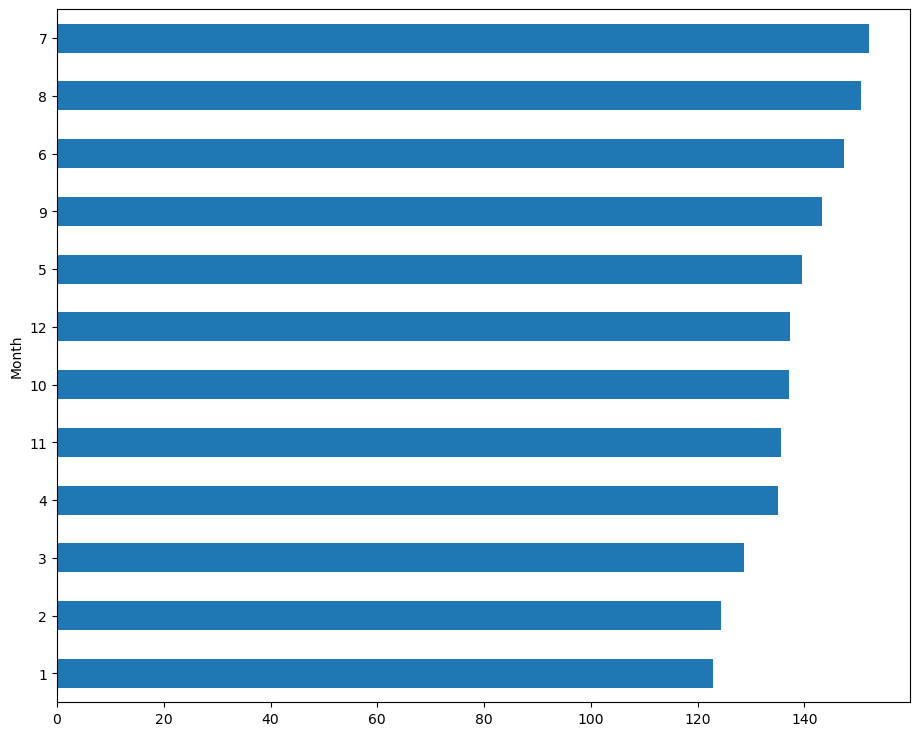

In [10]:
AirBNB_Calander.groupby('Month')['price'].mean().sort_values(ascending=True).plot(kind = "barh",figsize=(11, 9))

We can conclude from the Above Bar Plot, that in the Summer has the highest Prices (June,July,August),and during the first three months of the year we can see the prices go down (January,Feburary,March).

In [11]:
AirBNB_Calander['Day'] =  pd.DatetimeIndex(AirBNB_Calander['date']).day_name()


Grouped_Day = AirBNB_Calander.groupby("Day").agg(
    
    avg_DayName_Price = ("price", "mean"),
    Aval_Day= ("available", "mean")).sort_values(by="avg_DayName_Price", ascending = False)

Grouped_Day

,avg_DayName_Price,Aval_Day
Day,,
Saturday,143.202136,0.667758
Friday,143.036294,0.668911
Thursday,136.476032,0.669743
Sunday,136.459941,0.673001
Monday,135.676414,0.671101
Wednesday,135.447880,0.671793
Tuesday,135.408764,0.671954


<Axes: ylabel='Day'>

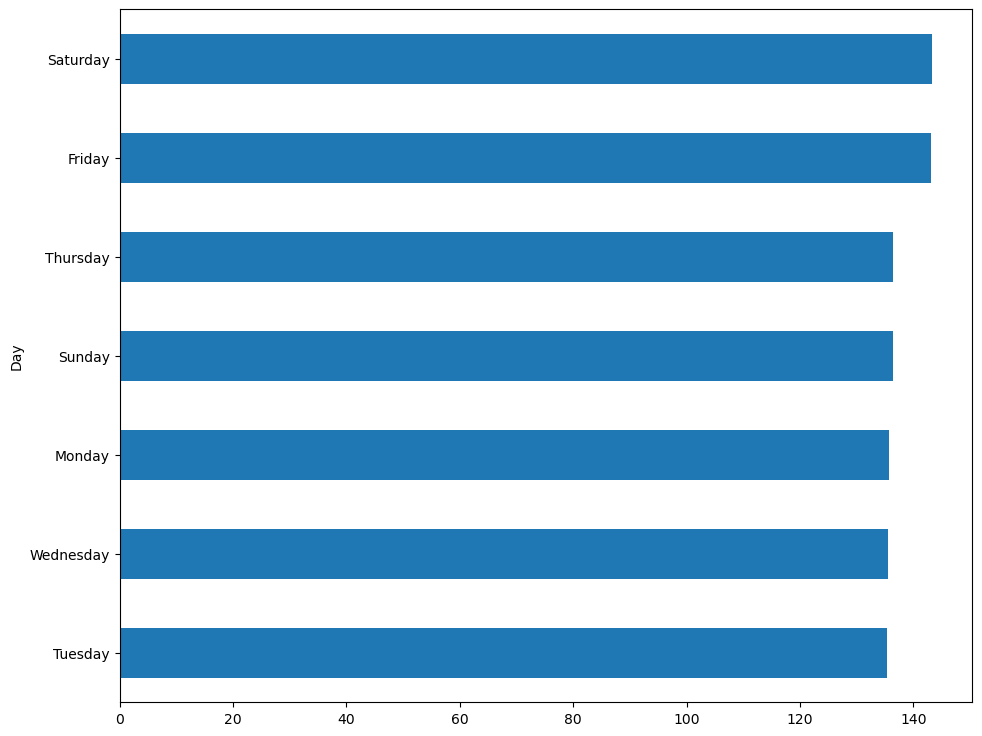

In [12]:
AirBNB_Calander.groupby('Day')['price'].mean().sort_values(ascending=True).plot(kind = "barh",figsize=(11, 9))

it appears that in holidays Friday and Saturday are the busiest during the year.

In [13]:
AirBNB_Listings['price'] = AirBNB_Listings['price'].str.extract(r'(\d+(?:\.\d+))')

AirBNB_Listings['price'] = pd.to_numeric(AirBNB_Listings['price'], downcast='integer')

In [14]:
Grouped_neighbourhood = AirBNB_Listings.groupby("neighbourhood_group_cleansed").agg(
    
    avg_Price = ("price", "mean"),
    Avg_Ratings = ("reviews_per_month","mean"),
    listings_Counts = ("calculated_host_listings_count", "sum")).sort_values(by="avg_Price", ascending = False)

Grouped_neighbourhood

,avg_Price,Avg_Ratings,listings_Counts
neighbourhood_group_cleansed,,,
Magnolia,177.672131,1.540851,107
Queen Anne,157.223729,2.147460,492
Downtown,154.405660,2.345764,1989
West Seattle,141.359606,1.860366,340
Cascade,140.101124,1.805077,125
Capitol Hill,130.592593,2.010974,2069
Central Area,128.338753,2.197188,670
Ballard,124.682609,2.570725,381
Other neighborhoods,118.709068,1.817139,2268


<Axes: ylabel='neighbourhood_group_cleansed'>

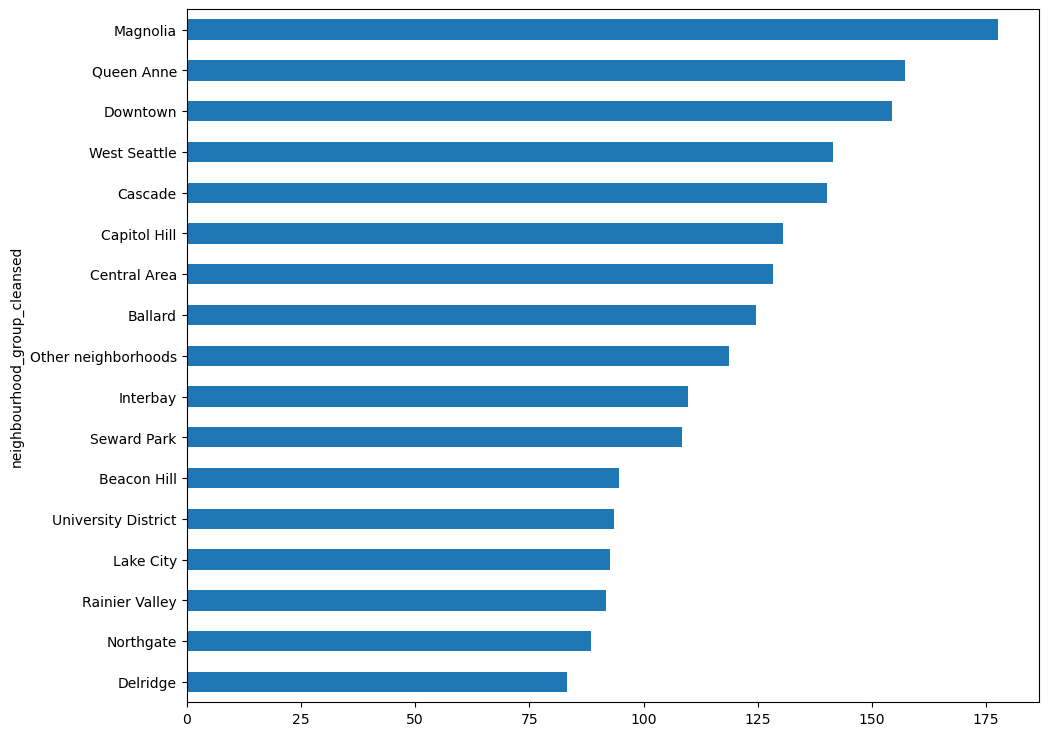

In [15]:
AirBNB_Listings.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=True).plot(kind = "barh",figsize=(11, 9))

We can see above that the most Expensive neighbourhoods are (Magnolia, Queen Anne, Downtown).
As for the Best Rated neighbourhoods Are (Seward Park, Ballard, and Rainier Valley).

I wonder if there's a correlation between the Prices and the reviews ?? lets see below

In [16]:
import numpy.ma as ma

x = AirBNB_Listings['price']
y = AirBNB_Listings['reviews_per_month']

print(ma.corrcoef(ma.masked_invalid(x), ma.masked_invalid(y)))

[[1.0 -0.21793280268828014]
 [-0.21793280268828014 1.0]]


Well it appears that there is a small negative correlation between Prices and Reviews for all the listings by -0.21.

## Conclusion

The most expensive time of the year would be in the summer while in the first three months (Jan,Feb,Mar) would be an excellent time for a budget Tourism in Seattle in terms of Prices.

As for the best neighbourhood to rent i would suggest immediatley the Rainer Valley, the reason why is that the plots above showed us that this neighbourhood has high average score (2.58) with an avg price (91.88) compared to the other neighbourhoods it would be a perfect spot to rent in.